In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('student_clustering.csv')
print('The shape of data is ', df.shape)
df.head()

The shape of data is  (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


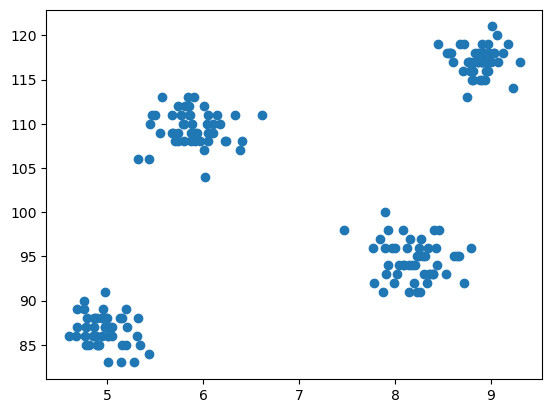

In [3]:
import matplotlib.pyplot as plt

# plot the data
plt.scatter(df['cgpa'],df['iq'])

In [4]:
# import the algo
from sklearn.cluster import KMeans

In [6]:
# now calculate the wcss to find the elbow point using Elbow Graph

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

In [7]:
wcss

[29957.898288000004,
 4184.141270000001,
 2364.005583420084,
 681.9696600000003,
 514.1616803171116,
 388.85240268759804,
 309.7616844397931,
 233.54082485509014,
 206.31644521295692,
 171.56716356743664]

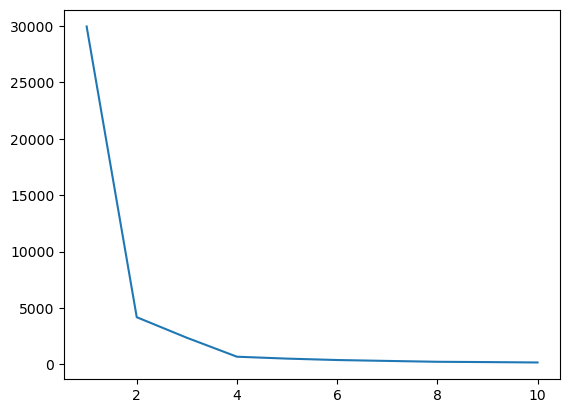

In [8]:
# now plot the Elbow Graph

plt.plot(range(1,11),wcss)

In [9]:
# from above graph we can see that Elbow point is 4
# so the cluster will be 4 for this case

X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
y_means

array([2, 0, 1, 1, 0, 0, 1, 3, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 2, 2, 1, 2, 3, 1, 0, 3, 0, 3, 0, 1, 1, 3, 0, 2, 0, 2, 1, 1, 2,
       3, 3, 1, 0, 3, 0, 2, 2, 3, 1, 3, 0, 0, 3, 0, 3, 0, 1, 1, 3, 2, 3,
       1, 2, 0, 1, 0, 3, 1, 2, 0, 3, 0, 3, 2, 1, 1, 3, 0, 2, 3, 2, 3, 0,
       3, 0, 3, 3, 1, 2, 1, 1, 3, 1, 2, 3, 0, 2, 2, 3, 2, 2, 1, 2, 3, 3,
       1, 3, 0, 0, 1, 3, 1, 0, 3, 2, 2, 0, 1, 3, 1, 2, 1, 0, 2, 1, 1, 0,
       2, 2, 0, 3, 0, 2, 1, 1, 1, 2, 0, 2, 2, 3, 2, 3, 0, 2, 3, 2, 3, 3,
       2, 1, 0, 3, 0, 1, 2, 3, 0, 1, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 1,
       3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 1, 1, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0,
       0, 3])

In [11]:
X[y_means == 3,1]

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

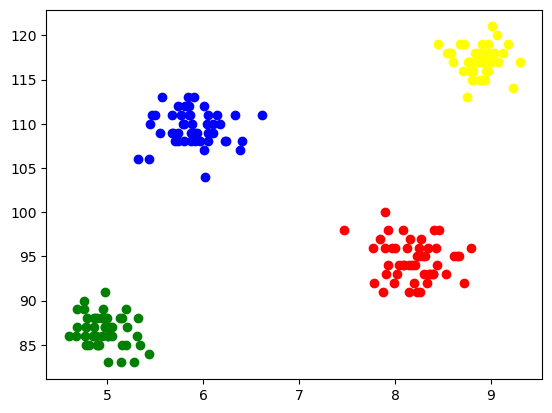

In [12]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# K-Means on 3-D Data

In [13]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [14]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [15]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [16]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\n\anaconda3\Lib\s

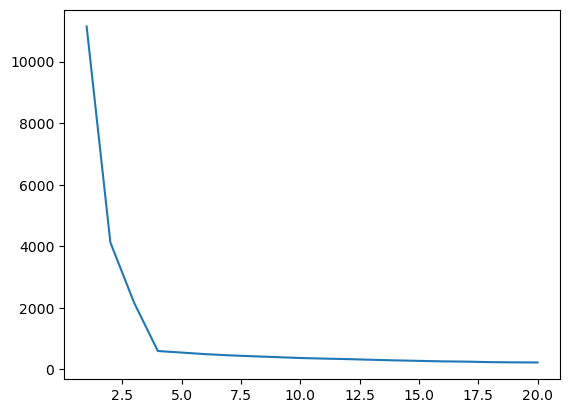

In [17]:
plt.plot(range(1,21),wcss)

In [18]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\n\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [19]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [20]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()